In [2]:
cd tensors

/files/home/part5/dsuess/Xenial/tensors


In [3]:
import mpnum as mp
from altmin import AltminEstimator
import itertools as it
from tqdm import tqdm
import matplotlib.pyplot as pl
import pickle

from mpnum.utils.extmath import randomized_svd

In [11]:
SITES = 8
RANK = 10
DIM = 4
m = int(0.2 * DIM**SITES)

X = mp.random_mpa(SITES, DIM, RANK, normalized=True)

100%|██████████| 10/10 [00:26<00:00,  2.66s/it]


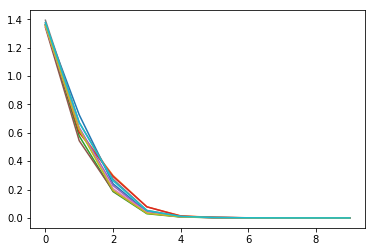

In [12]:
STEPS = 10

def get_estims():
    A = [mp.random_mpa(SITES, DIM, 1, normalized=True)
         for _ in range(m)]
    b = [mp.special.inner_prod_mps(a, X) for a in A]
    X_init = mp.special.sumup(A, rank=RANK, weights=b, svdfunc=randomized_svd)
    X_init /= mp.norm(X_init)
    estim = AltminEstimator(A, b, 1, X_init=X_init.copy())
    return [X_sharp for X_sharp in tqdm(it.islice(estim, STEPS), total=STEPS)]

X_sharps = [get_estims() for _ in range(10)]

for X_sharp in X_sharps:
    pl.plot([mp.normdist(X, X_s) for X_s in X_sharp])

In [13]:
with open('recoveries_rank10_20percent.pkl', 'wb') as buf:
    pickle.dump((X, X_sharps), buf)

In [ ]:
mp.normdist(X, X_sharps[0][0])

In [ ]:
A = [mp.random_mpa(SITES, DIM, 1, normalized=True)
     for _ in range(m)]
b = [mp.special.inner_prod_mps(a, X) for a in A]
X_init = mp.special.sumup(A, rank=RANK, weights=b, svdfunc=randomized_svd)
X_init /= mp.norm(X_init)
mp.normdist(X, X_init)